# NFFT Package

The ``nfft`` package is a lightweight implementation of the non-equispaced
fast Fourier transform (NFFT), based on numpy and scipy and released under
an MIT license.

The NFFT is described in *Using NFFT 3 – a software library for various nonequispaced
fast Fourier transforms* ([pdf](https://www-user.tu-chemnitz.de/~potts/paper/nfft3.pdf)), which describes a C library that computes the NFFT and several variants and extensions.

## Included Algorithms

The ``nfft`` package currently implements only a few of the algorithms described in the above paper, in particular:

### The one-dimensional forward NDFT and NFFT

The forward transform is given by

$$
f_j = \sum_{k=-N/2}^{N/2-1} \hat{f}_k e^{-2\pi i k x_j}
$$

for complex amplitudes $\{f_k\}$ specified at the range of integer wavenumbers $k$ in the range $-N/2 \le k < N$, evaluated at points $\{x_j\}$ satisfying $-1/2 \le x_j < 1/2$.

This can be computed via the ``nfft.ndft()`` and ``nfft.nfft()`` functions, respectively.
  

### The one-dimensional adjoint NDFT and NFFT

The adjoint transform is given by

$$
\hat{f}_k = \sum_{j=0}^{M-1} f_j e^{2\pi i k x_j}
$$

for complex values $\{f_j\}$ at points $\{x_j\}$ satisfying $-1/2 \le x_j < 1/2$,
and for the range of integer wavenumbers $k$ in the range $-N/2 \le k < N$.

This can be computed via the ``nfft.ndft_adjoint()`` and ``nfft.nfft_adjoint()`` functions, respectively.

## Complexity

The computational complexity of both the forward and adjoint algorithm is approximately

$$
\mathcal{O}[N\log(N) + M\log(1 / \epsilon)]
$$

where $\epsilon$ is the desired tolerance of the result.
In the current implementation, the memory requirements are approximately

$$
\mathcal{O}[N + M\log(1 / \epsilon)]
$$

## Comparison to pynfft

Another option for computing the NFFT in Python is to use the [pynfft](https://github.com/ghisvail/pyNFFT/) package, which wraps the C library referenced in the above paper.
The advantage of ``pynfft`` is that it provides a more complete set of routines, including multi-dimensional NFFTs and various computing strategies.

The disadvantage is that ``pynfft`` is GPL-licensed, and has a more complicated set of dependencies.

Performance-wise, ``nfft`` and ``pynfft`` are comparable, with the ``nfft`` package discussed here being up to a factor of 2 faster in most cases of interest (see [Benchmarks.ipynb](Benchmarks.ipynb) for some benchmarks).

## Installation

The ``nfft`` package can be installded directly from the Python Package Index:

```
$ pip install nfft
```

Dependencies are [numpy](http://www.numpy.org), [scipy](http://www.scipy.org), and [pytest](http://www.pytest.org).

## Testing

Unit tests can be run using [pytest](http://pytest.org):

```
$ pytest --pyargs nfft
```

## Usage

Here are some examples of computing the NFFT and its adjoint, using both a direct method and the fast method:

### Forward Transform

$$
f_j = \sum_{j=0}^{M-1} \hat{f}_k e^{-2\pi i k x_j}, 
$$

In [2]:
import numpy as np
import nfft

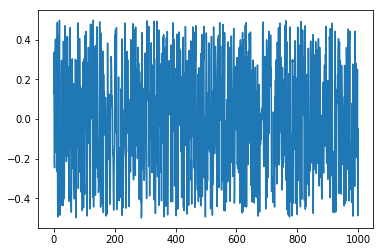

In [12]:
# define evaluation points
x = -0.5 + np.random.rand(1000)

# define Fourier coefficients
N = 10000
k = N // 2 + np.arange(N)
f_k = np.random.randn(N)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x)
plt.show()

Wall time: 1.05 s


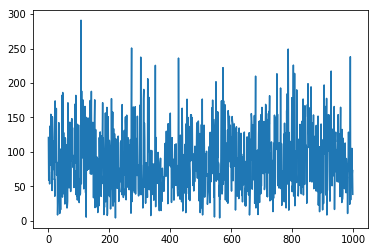

In [10]:
# direct Fourier transform
%time f_x_direct = nfft.ndft(x, f_k)
plt.plot(np.abs(f_x_direct))
plt.show()

In [4]:
# fast Fourier transform
%time f_x_fast = nfft.nfft(x, f_k)

CPU times: user 10 ms, sys: 2.11 ms, total: 12.1 ms
Wall time: 7.02 ms


In [5]:
# Compare the results
np.allclose(f_x_direct, f_x_fast)

True

### Adjoint Transform

$$
\hat{f}_k = \sum_{j=0}^{M-1} f_j e^{2\pi i k x_j}, 
$$

In [6]:
# define observations

f = np.random.rand(len(x))

In [7]:
# direct adjoint transform
%time f_k_direct = nfft.ndft_adjoint(x, f, N)

CPU times: user 473 ms, sys: 116 ms, total: 590 ms
Wall time: 450 ms


In [8]:
# fast adjoint transform
%time f_k_fast = nfft.nfft_adjoint(x, f, N)

CPU times: user 7.75 ms, sys: 1.56 ms, total: 9.3 ms
Wall time: 4.94 ms


In [9]:
# Compare the results
np.allclose(f_k_direct, f_k_fast)

True